In [1]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hiteshram
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis


100%|██████████| 1.74G/1.74G [00:18<00:00, 99.1MB/s]


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Input

In [20]:
train_dir = "/content/chest-xray-pneumoniacovid19tuberculosis/train"
test_dir = "/content/chest-xray-pneumoniacovid19tuberculosis/test"
val_dir = "/content/chest-xray-pneumoniacovid19tuberculosis/val"

In [4]:
import os

for dirpath, dirnames, filenames in os.walk("/content/chest-xray-pneumoniacovid19tuberculosis"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} Image in '{dirpath}' ")

There are 3 directories and 0 Image in '/content/chest-xray-pneumoniacovid19tuberculosis' 
There are 4 directories and 0 Image in '/content/chest-xray-pneumoniacovid19tuberculosis/val' 
There are 0 directories and 8 Image in '/content/chest-xray-pneumoniacovid19tuberculosis/val/NORMAL' 
There are 0 directories and 8 Image in '/content/chest-xray-pneumoniacovid19tuberculosis/val/PNEUMONIA' 
There are 0 directories and 10 Image in '/content/chest-xray-pneumoniacovid19tuberculosis/val/COVID19' 
There are 0 directories and 12 Image in '/content/chest-xray-pneumoniacovid19tuberculosis/val/TURBERCULOSIS' 
There are 4 directories and 0 Image in '/content/chest-xray-pneumoniacovid19tuberculosis/test' 
There are 0 directories and 234 Image in '/content/chest-xray-pneumoniacovid19tuberculosis/test/NORMAL' 
There are 0 directories and 390 Image in '/content/chest-xray-pneumoniacovid19tuberculosis/test/PNEUMONIA' 
There are 0 directories and 106 Image in '/content/chest-xray-pneumoniacovid19tuberc

In [5]:
import numpy as np
import pathlib
path = pathlib.Path('/content/chest-xray-pneumoniacovid19tuberculosis/train')
class_names = np.array(sorted([item.name for item in path.glob("*")]))

In [6]:
print(class_names)

['COVID19' 'NORMAL' 'PNEUMONIA' 'TURBERCULOSIS']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  # return img

Image shape: (1024, 1024, 3)


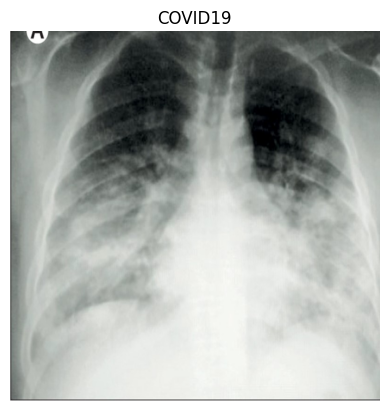

In [8]:
img  = view_random_image('/content/chest-xray-pneumoniacovid19tuberculosis/train/', 'COVID19')

Image shape: (898, 898, 3)
Image shape: (967, 1376)
Image shape: (720, 1224)
Image shape: (512, 512)


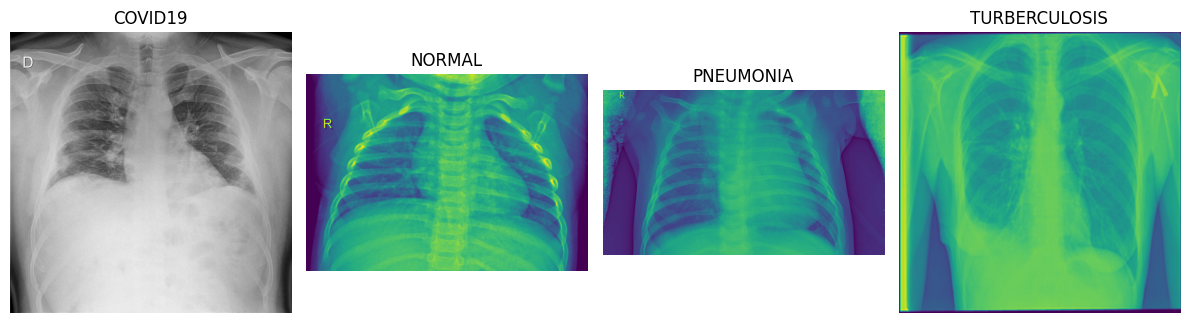

In [9]:
categories = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']
# Create a figure for the subplots
plt.figure(figsize=(12, 4))

# Loop through the categories and plot the images
for i, category in enumerate(categories):
    plt.subplot(1, 4, i+1)
    img = view_random_image('/content/chest-xray-pneumoniacovid19tuberculosis/train/', category)
    plt.title(category)
    plt.axis('off')  # Hide the axes

# Show the plot
plt.tight_layout()
plt.show()

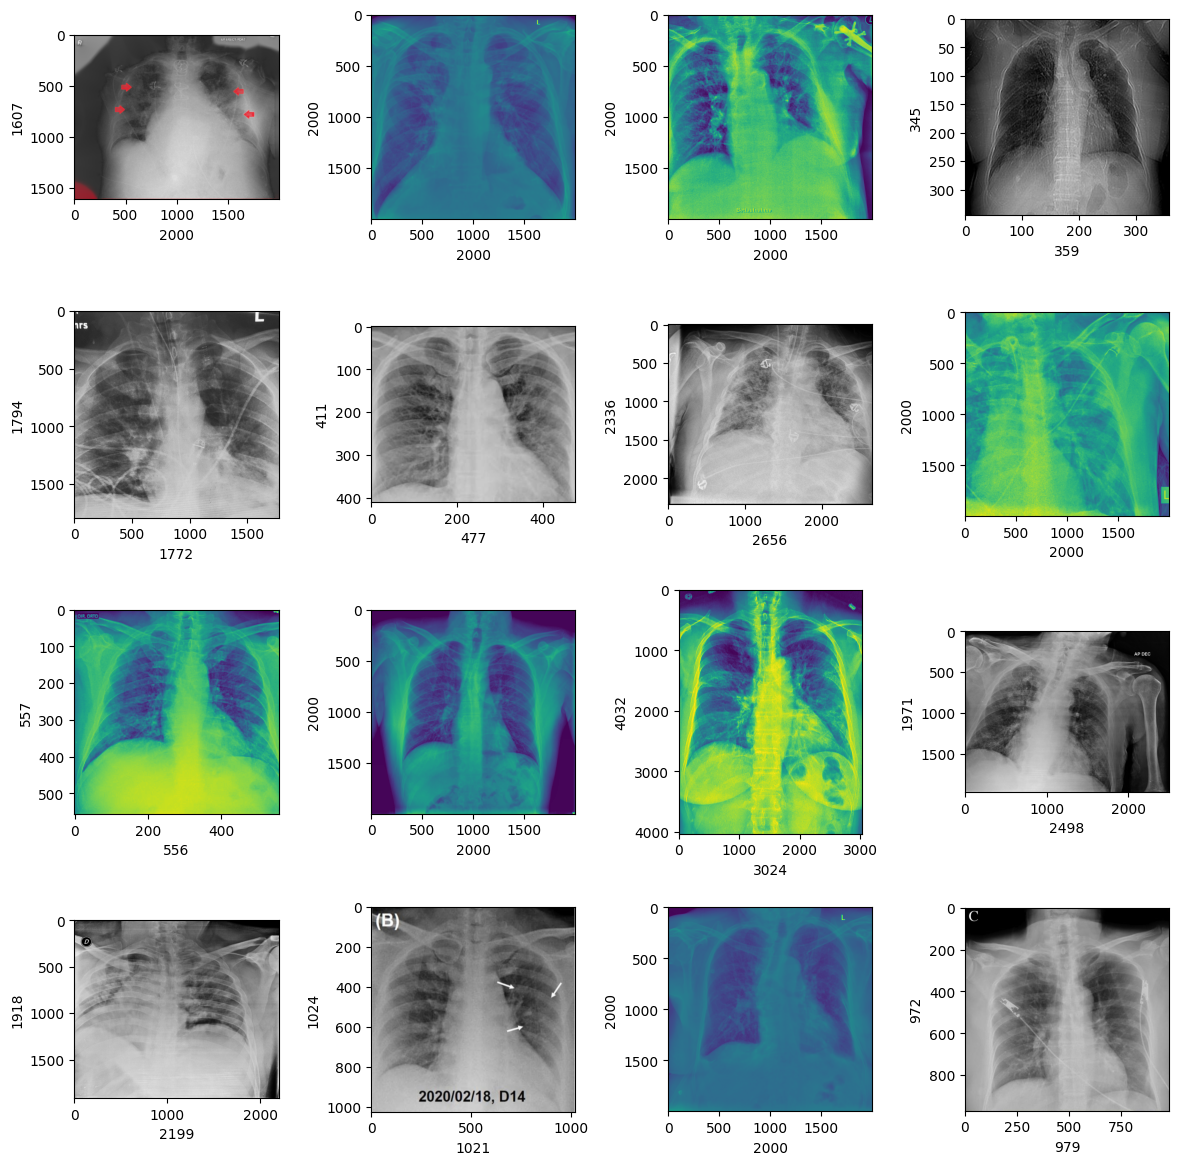

In [10]:
plt.figure(figsize = (12, 12))
path = '/content/chest-xray-pneumoniacovid19tuberculosis/train/COVID19'
for i in range(1, 17):
  plt.subplot(4, 4, i)
  plt.tight_layout()

  rand_img = random.sample(os.listdir(path), 1)[0]
  img = imread(os.path.join(path, rand_img))

  plt.imshow(img)

  plt.xlabel(img.shape[1], fontsize = 10)
  plt.ylabel(img.shape[0], fontsize = 10)


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'sparse',
                                               shuffle = False)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'sparse')
test_data = test_datagen.flow_from_directory(val_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'sparse')

Found 6326 images belonging to 4 classes.
Found 771 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [23]:
# Load VGG16 with pre-trained ImageNet weights, excluding the top (fully connected) layers
base_model = VGG16(weights = None,
                   include_top = False,
                   input_tensor = Input(shape = (224, 224, 3)))

In [24]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Load VGG16 with pre-trained ImageNet weights, excluding the top (fully connected) layers
base_model = VGG16(weights = 'imagenet',
                   include_top = False,
                   input_tensor = Input(shape = (224, 224, 3)))
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Freeze the layers in the base model
for layer in base_model.layers:
  layer.trainable = False

In [27]:
# Build model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation = 'softmax')
])

In [28]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [29]:
history = model.fit(train_data,
                    validation_data = valid_data,
                    epochs = 5)

Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 150s 723ms/step - accuracy: 0.6169 - loss: 1.3455 - val_accuracy: 0.8197 - val_loss: 0.5002
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 141s 694ms/step - accuracy: 0.7848 - loss: 0.5378 - val_accuracy: 0.7951 - val_loss: 0.4672
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 145s 710ms/step - accuracy: 0.8485 - loss: 0.3675 - val_accuracy: 0.8820 - val_loss: 0.3413
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 145s 701ms/step - accuracy: 0.8752 - loss: 0.3183 - val_accuracy: 0.6770 - val_loss: 0.7559
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 198s 687ms/step - accuracy: 0.8527 - loss: 0.3729 - val_accuracy: 0.8145 - val_loss: 0.4897


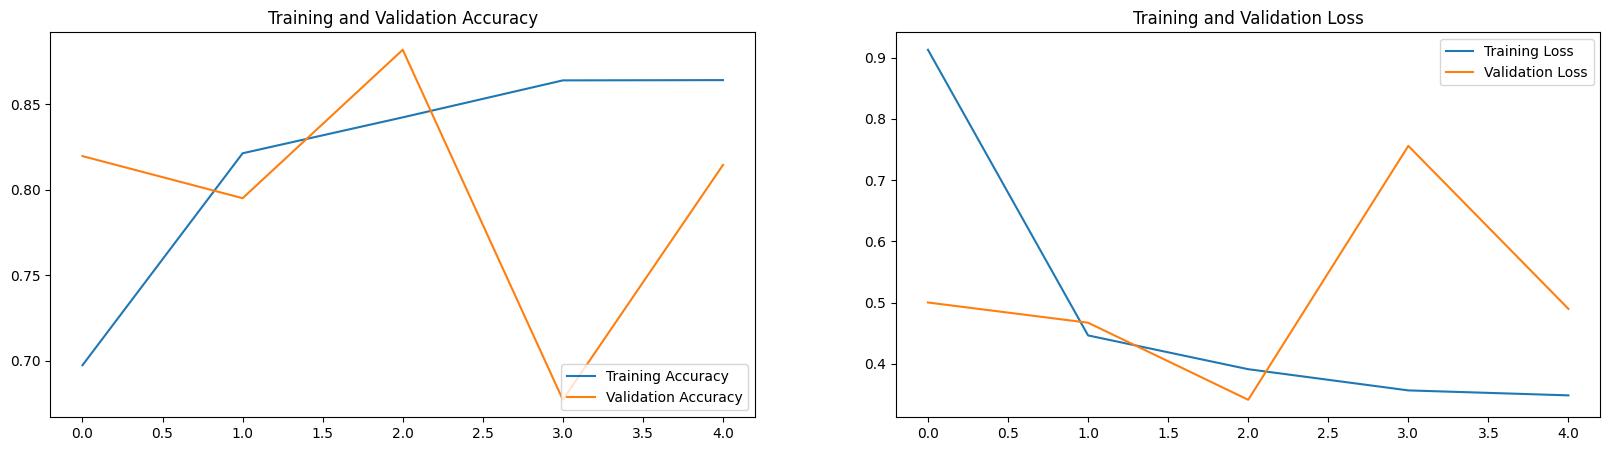

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 0.8635 - loss: 0.4351
Test Accuracy: 84.21%
